# Hacker analysis

In the project we are going to look at Hacker News site, a popular site among tech enaustics, we going to be looking at the post data (https://www.kaggle.com/datasets/hacker-news/hacker-news-posts) 

We are going to draw out inisghts on the two famous titles suffixes ASK HN & Show NH, we will ask question from the diffrent fiels provided in the data

Below is the diffrent colums in the data :

* id: The unique identifier from Hacker News for the post
* title: The title of the post
* url: The URL that the posts links to, if it the post has a URL
* num_points: The number of points the post acquired, calculated as the total number of upvotes minus the total number of downvotes
* num_comments: The number of comments that were made on the post
* author: The username of the person who submitted the post
* created_at: The date and time at which the post was submitted

### Reading Data from file

In [1]:
opened_file = open('hacker_news.csv')
from csv import reader
read_file = reader(opened_file)
hn = list(read_file)
opened_file.close()

In [2]:
hn[:5]

[['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'],
 ['12224879',
  'Interactive Dynamic Video',
  'http://www.interactivedynamicvideo.com/',
  '386',
  '52',
  'ne0phyte',
  '8/4/2016 11:52'],
 ['10975351',
  'How to Use Open Source and Shut the Fuck Up at the Same Time',
  'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/',
  '39',
  '10',
  'josep2',
  '1/26/2016 19:30'],
 ['11964716',
  "Florida DJs May Face Felony for April Fools' Water Joke",
  'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/',
  '2',
  '1',
  'vezycash',
  '6/23/2016 22:20'],
 ['11919867',
  'Technology ventures: From Idea to Enterprise',
  'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429',
  '3',
  '1',
  'hswarna',
  '6/17/2016 0:01']]

In [3]:
headers = hn[:1]

In [4]:
headers

[['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']]

In [5]:
hn[:5]

[['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'],
 ['12224879',
  'Interactive Dynamic Video',
  'http://www.interactivedynamicvideo.com/',
  '386',
  '52',
  'ne0phyte',
  '8/4/2016 11:52'],
 ['10975351',
  'How to Use Open Source and Shut the Fuck Up at the Same Time',
  'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/',
  '39',
  '10',
  'josep2',
  '1/26/2016 19:30'],
 ['11964716',
  "Florida DJs May Face Felony for April Fools' Water Joke",
  'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/',
  '2',
  '1',
  'vezycash',
  '6/23/2016 22:20'],
 ['11919867',
  'Technology ventures: From Idea to Enterprise',
  'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429',
  '3',
  '1',
  'hswarna',
  '6/17/2016 0:01']]

### Filtering data

Below we are going to filter data to only get post that have title siffices of Ask HN and Show HN

In [6]:
ask_posts = []
show_posts = []
other_posts = []

In [7]:
for row in hn:
    title = row[1]
    
    if title.lower().startswith('ask hn'):
        ask_posts.append(row)
    elif title.lower().startswith('show hn'):
        show_posts.append(row)
    else:
        other_posts.append(row)

In [8]:
print(" Ask posts : ", len(ask_posts))
print(" Show posts : ",len(show_posts))
print(" Other posts : ", len(other_posts))

 Ask posts :  1744
 Show posts :  1162
 Other posts :  17195


### Drilling down on posts

Below we calculate the average comments on each posts

In [9]:
total_ask_comments = 0

for row in ask_posts:
    num_comments = row[4]
    
    total_ask_comments += int(num_comments)
    


In [10]:
avg_ask_comments = total_ask_comments/len(ask_posts)
print('Average ask comments :', avg_ask_comments)

Average ask comments : 14.038417431192661


In [11]:
total_show_comments = 0

for row in show_posts:
    num_comments = row[4]
    
    total_show_comments += int(num_comments)

In [12]:
avg_show_comments = total_show_comments/len(show_posts)
print('Average show comments :', avg_show_comments)

Average show comments : 10.31669535283993


From the above averages, the data indicate Ask comments receive a hihger average 
of comments than show comments, which this is inline with intutuion that if you asking
you will recive more anwers

### Looking into comments time
On the below part we look at the comments date time to try determine if posts at the certain
time attracks more comments

In [13]:
import datetime as dt

In [14]:
result_list = []

for row in ask_posts:
    created_at = row[6]
    num_comments = int(row[4])
    result_list.append([created_at,num_comments])

In [15]:
counts_by_hour = {}
comments_by_hour = {}

for row in result_list:
    
    num_comments = row[1]
    date = row[0]
    date = dt.datetime.strptime(date, "%m/%d/%Y %H:%M")

    if date.hour in counts_by_hour:
        counts_by_hour[date.hour] += 1
        comments_by_hour[date.hour] += num_comments
    else:
        counts_by_hour[date.hour] = 1
        comments_by_hour[date.hour] = num_comments

print(counts_by_hour)

print(comments_by_hour)

{9: 45, 13: 85, 10: 59, 14: 107, 16: 108, 23: 68, 12: 73, 17: 100, 15: 116, 21: 109, 20: 80, 2: 58, 18: 109, 3: 54, 5: 46, 19: 110, 1: 60, 22: 71, 8: 48, 4: 47, 0: 55, 6: 44, 7: 34, 11: 58}
{9: 251, 13: 1253, 10: 793, 14: 1416, 16: 1814, 23: 543, 12: 687, 17: 1146, 15: 4477, 21: 1745, 20: 1722, 2: 1381, 18: 1439, 3: 421, 5: 464, 19: 1188, 1: 683, 22: 479, 8: 492, 4: 337, 0: 447, 6: 397, 7: 267, 11: 641}


In [16]:
avg_by_hour = []

for row in counts_by_hour:
    
    result = [row,comments_by_hour[row]/counts_by_hour[row]]
    avg_by_hour.append(result)


In [17]:
print(' Avg comments by hour : ', avg_by_hour)

 Avg comments by hour :  [[9, 5.5777777777777775], [13, 14.741176470588234], [10, 13.440677966101696], [14, 13.233644859813085], [16, 16.796296296296298], [23, 7.985294117647059], [12, 9.41095890410959], [17, 11.46], [15, 38.5948275862069], [21, 16.009174311926607], [20, 21.525], [2, 23.810344827586206], [18, 13.20183486238532], [3, 7.796296296296297], [5, 10.08695652173913], [19, 10.8], [1, 11.383333333333333], [22, 6.746478873239437], [8, 10.25], [4, 7.170212765957447], [0, 8.127272727272727], [6, 9.022727272727273], [7, 7.852941176470588], [11, 11.051724137931034]]


In [18]:
swap_avg_by_hour = []

for row in avg_by_hour:
    swap_avg_by_hour.append([row[1],row[0]])
    

In [19]:
print('Swap Avg comments by hour :',swap_avg_by_hour)

Swap Avg comments by hour : [[5.5777777777777775, 9], [14.741176470588234, 13], [13.440677966101696, 10], [13.233644859813085, 14], [16.796296296296298, 16], [7.985294117647059, 23], [9.41095890410959, 12], [11.46, 17], [38.5948275862069, 15], [16.009174311926607, 21], [21.525, 20], [23.810344827586206, 2], [13.20183486238532, 18], [7.796296296296297, 3], [10.08695652173913, 5], [10.8, 19], [11.383333333333333, 1], [6.746478873239437, 22], [10.25, 8], [7.170212765957447, 4], [8.127272727272727, 0], [9.022727272727273, 6], [7.852941176470588, 7], [11.051724137931034, 11]]


In [20]:
sorted_swap = sorted(swap_avg_by_hour,reverse=True)

### Top 5 Hours for Ask Posts Comments

In [23]:
template = ' {time}: {avg:.2f} average comments per post'

print("Top 5 Hours for 'Ask HN' Comments")


for row in sorted_swap[:5]:
    
    hour = row[1]
    average = row[0]
    
    hour = dt.datetime.strptime(str(hour),'%H')
    
    hour = hour.strftime('%H:%M')
    
    message = template.format(time=hour,avg=average)
    
    print(message)

    
    
    

Top 5 Hours for 'Ask HN' Comments
 15:00: 38.59 average comments per post
 02:00: 23.81 average comments per post
 20:00: 21.52 average comments per post
 16:00: 16.80 average comments per post
 21:00: 16.01 average comments per post


### Visualizing the results

In [32]:
x_axis = []
y_axis = []
for row in sorted_swap:
    
    hour = row[1]
    average = row[0]
        
    x_axis.append(hour)
    y_axis.append(average)
    
    


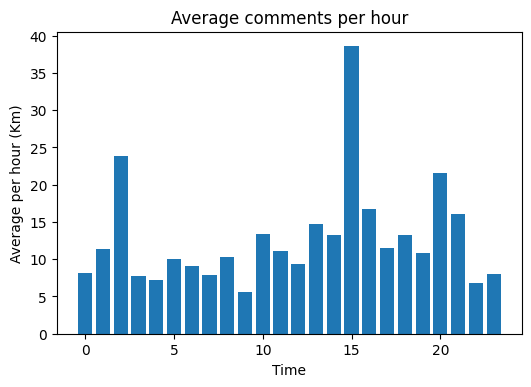

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
 
# Function to plot
plt.bar(x_axis, y_axis)

plt.title("Average comments per hour")
 
# Labeling the axes
plt.xlabel("Time")
plt.ylabel("Average per hour (Km)")
    
# function to show the plot
plt.show()



# Conclusion
Based on the Data if you want to get most comments on your post you might want to target the 15:00 hour, as it yields the biggest comments average